In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
#download price data into dataframe
df = yf.download('AXP', start='2020-03-30',end='2023-03-23', progress=False)
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)
df

,adj_close
Date,
2020-03-30 00:00:00-04:00,86.542320
2020-03-31 00:00:00-04:00,82.074745
2020-04-01 00:00:00-04:00,74.625610
2020-04-02 00:00:00-04:00,73.902603
2020-04-03 00:00:00-04:00,70.952637
...,...
2023-03-16 00:00:00-04:00,160.729996
2023-03-17 00:00:00-04:00,156.520004
2023-03-20 00:00:00-04:00,158.740005


In [3]:
#calculate simple and log returns
df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))

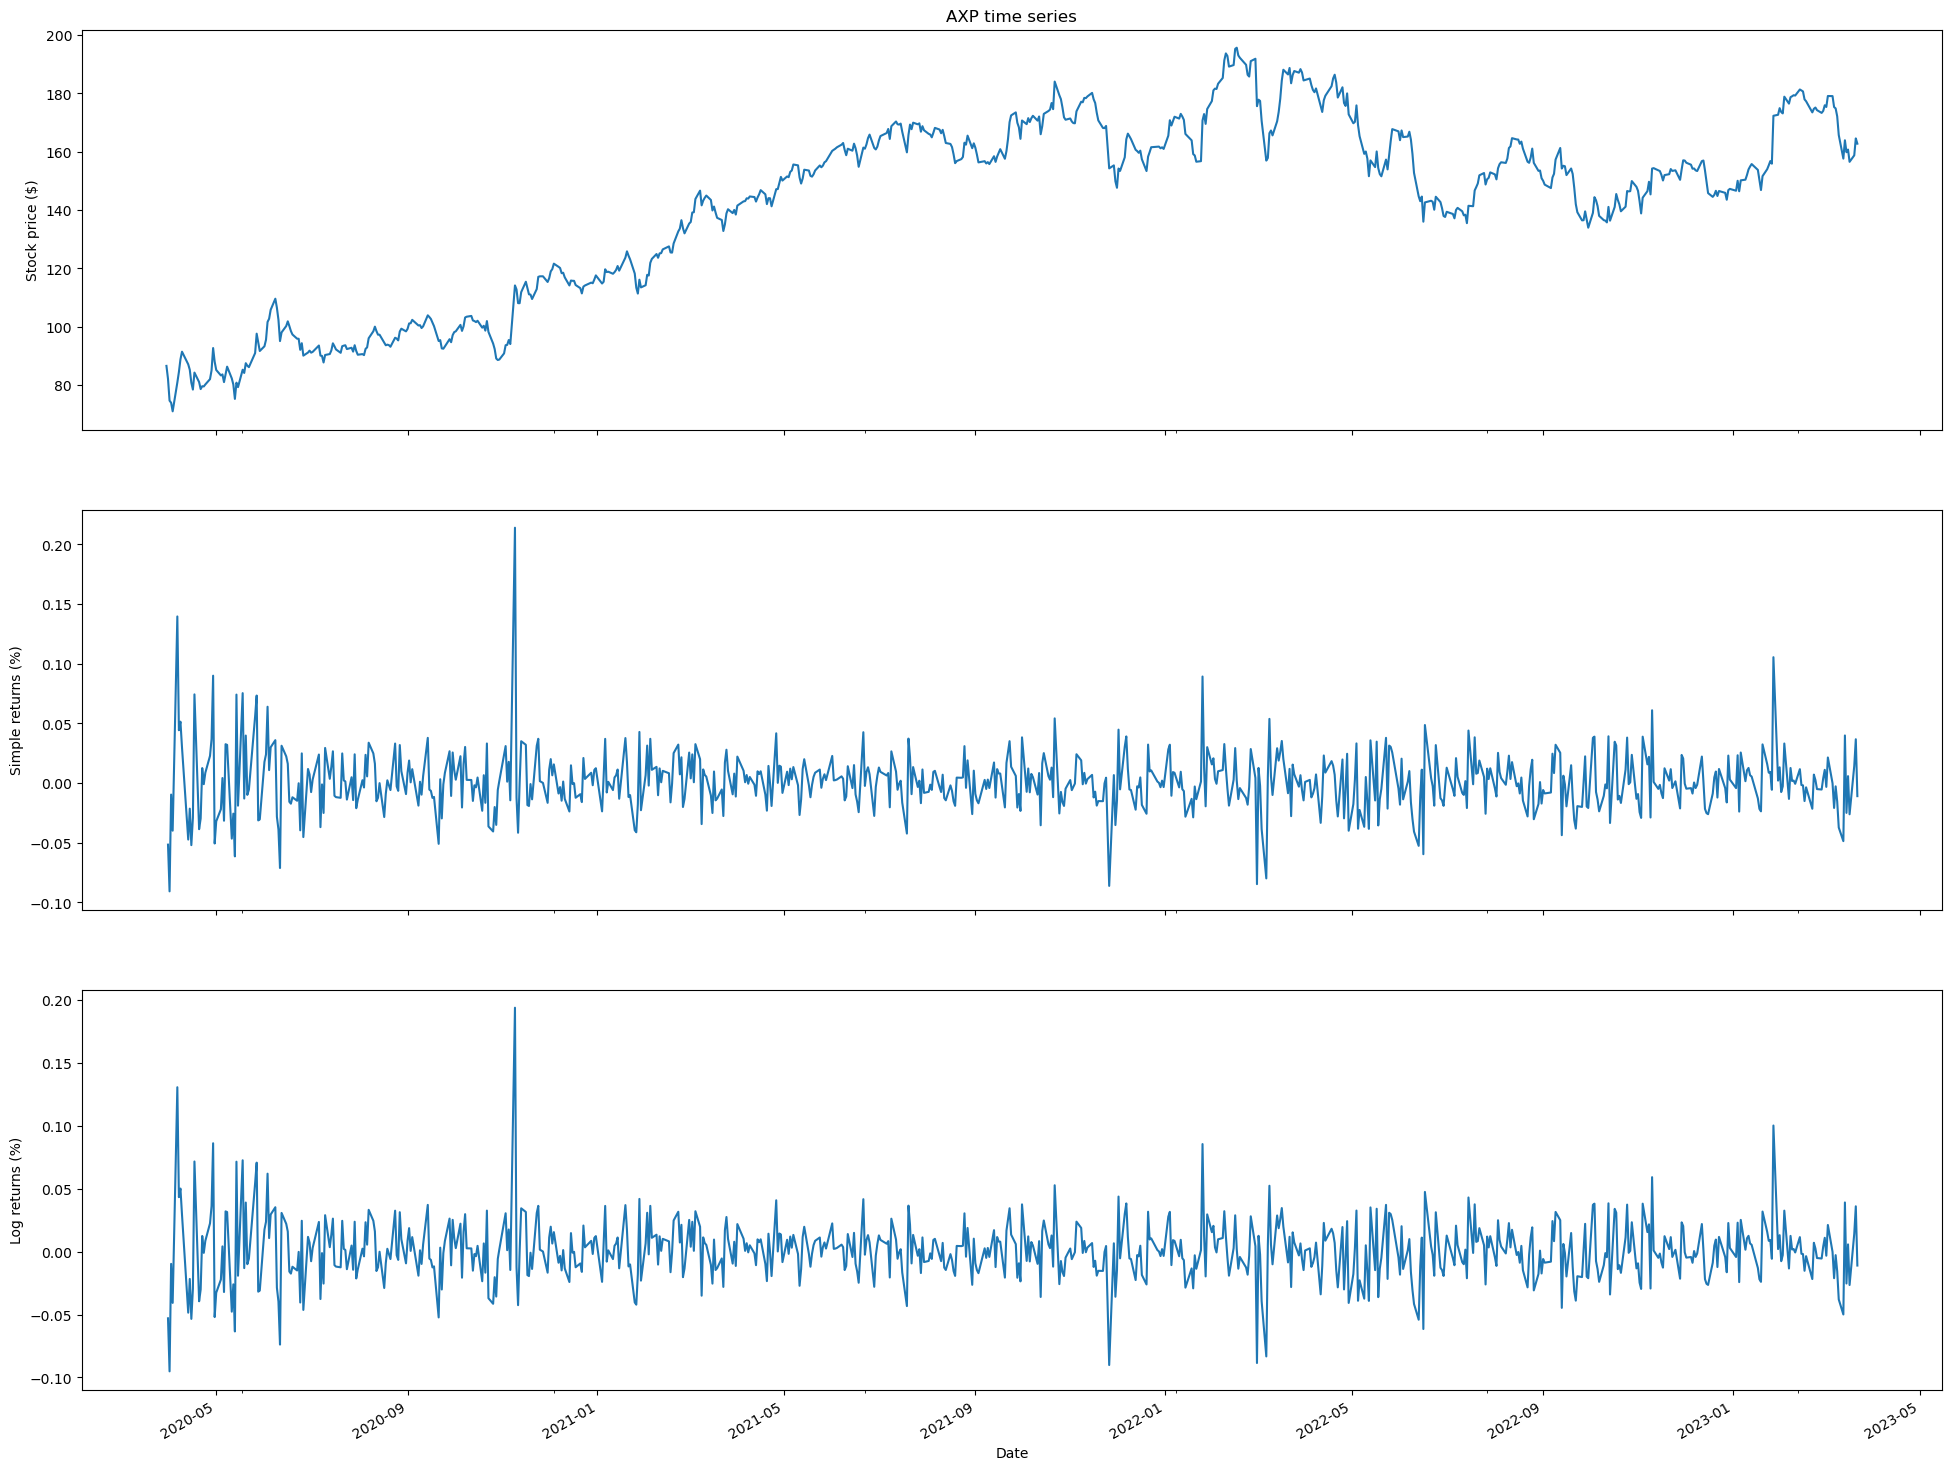

In [4]:
#plot times series of stock appreciation, simple(arithmetic) return, log returns
fig, ax = plt.subplots(3, 1, figsize=(24, 20), sharex=True)
df.adj_close.plot(ax=ax[0])
ax[0].set(title = 'AXP time series', ylabel = 'Stock price ($)')
df.simple_rtn.plot(ax=ax[1])
ax[1].set(ylabel = 'Simple returns (%)')
df.log_rtn.plot(ax=ax[2])
ax[2].set(xlabel = 'Date', ylabel = 'Log returns (%)')
plt.show()